## Plot Histogram of single band

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image_path):
    """
    Plots the histogram of pixel values for an entire single-band GeoTIFF image.
    :param image_path: Path to the single-band GeoTIFF image.
    """
    # Load the single-band image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} could not be loaded.")
    
    # Compute the histogram
    pixel_values = image.flatten()  # Flatten the image to a 1D array
    histogram, bins = np.histogram(pixel_values, bins=256, range=(0, 65535))  # Assuming 16-bit images
    
    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.bar(bins[:-1], histogram, width=(bins[1] - bins[0]), color='blue', alpha=0.7, edgecolor='black')
    plt.title("Histogram of Pixel Intensities")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

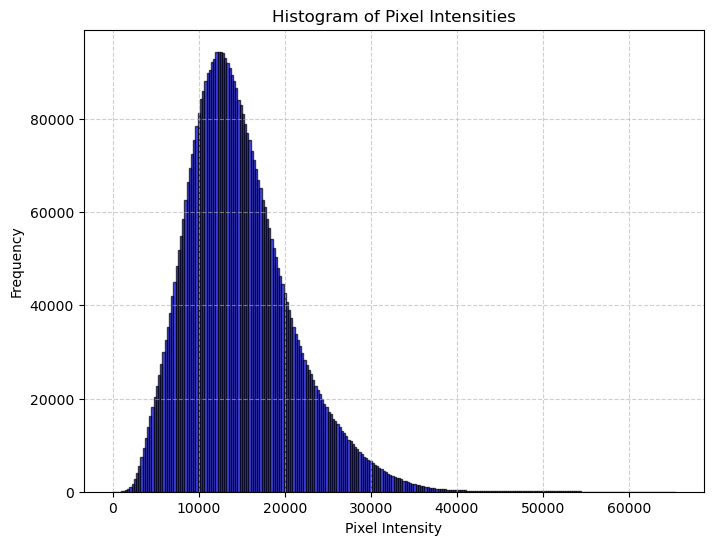

In [35]:

# Example usage
# image_path = "data/20_15/output_images/zuRL1X92MtbuKJg7yKci_tif/Red.tif"  # Replace with the path to your image
image_path = "data/20_15/output_images/kPaL9r6000M8WMFBS59X.tif/Red.tif"
plot_histogram(image_path)

## Compare Histogram of 2 bands

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image_path, bins=256, range=(0, 65535)):
    """
    Compute the histogram of a single-band GeoTIFF image.
    :param image_path: Path to the single-band GeoTIFF image.
    :param bins: Number of bins for the histogram.
    :param range: Range of pixel intensity values.
    :return: Histogram array and bin edges.
    """
    # Load the single-band image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} could not be loaded.")
    
    # Flatten the image to 1D and compute histogram
    pixel_values = image.flatten()
    histogram, bin_edges = np.histogram(pixel_values, bins=bins, range=range)
    return histogram, bin_edges

def compare_histograms(image_path1, image_path2, bins=256, range=(0, 65535)):
    """
    Compare histograms of two single-band GeoTIFF images.
    :param image_path1: Path to the first single-band GeoTIFF image.
    :param image_path2: Path to the second single-band GeoTIFF image.
    :param bins: Number of bins for the histogram.
    :param range: Range of pixel intensity values.
    """
    # Compute histograms for both images
    hist1, bins1 = compute_histogram(image_path1, bins, range)
    hist2, bins2 = compute_histogram(image_path2, bins, range)
    
    # Plot the histograms for comparison
    plt.figure(figsize=(10, 6))
    bin_centers1 = (bins1[:-1] + bins1[1:]) / 2  # Compute bin centers
    bin_centers2 = (bins2[:-1] + bins2[1:]) / 2  # Compute bin centers

    plt.plot(bin_centers1, hist1, label='Oil Red Band', color='blue', alpha=0.7)
    plt.plot(bin_centers2, hist2, label='Water Red Band', color='red', alpha=0.7)
    plt.fill_between(bin_centers1, hist1, alpha=0.3, color='blue')
    plt.fill_between(bin_centers2, hist2, alpha=0.3, color='red')

    plt.title("Histogram Comparison of Two Single-Band Images", fontsize=18)
    plt.xlabel("Pixel Intensity", fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

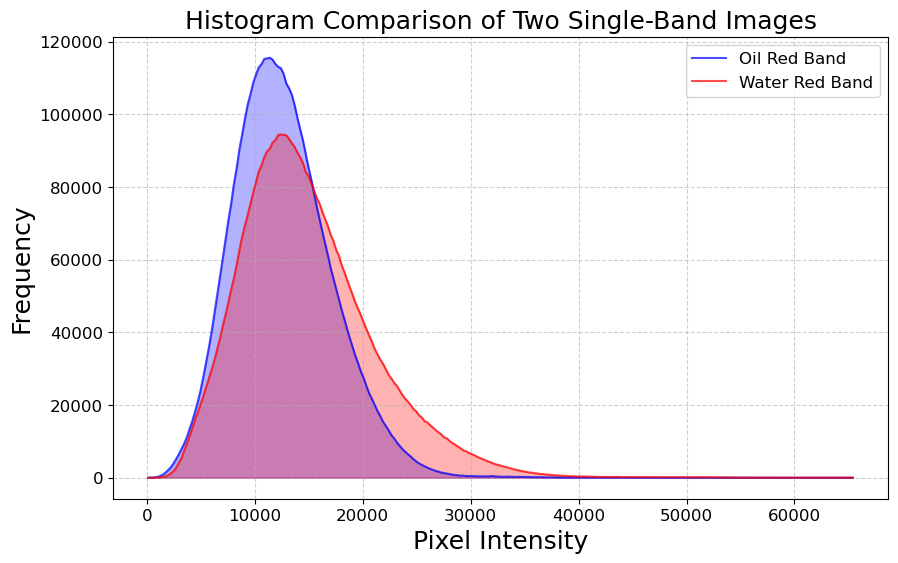

In [2]:
# Example usage
image_path1 = "data/20_15/output_images_backup/zuRL1X92MtbuKJg7yKci_tif/Red.tif"  # Replace with the path to the first image
image_path2 = "data/20_15/output_images_backup/kPaL9r6000M8WMFBS59X.tif/Red.tif"  # Replace with the path to the second image
compare_histograms(image_path1, image_path2)

Histograms consider the entire image, the small size of water or oil patches may result in their pixel intensity distributions being overshadowed by the background or other regions.

## Compute Statistics
Lists the mean and standard deviation for each band for water and oil patches.
Helps identify which bands have the most variation.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def compute_statistics(image_path):
    """
    Compute basic statistics for a single-band GeoTIFF image.
    :param image_path: Path to the single-band GeoTIFF image.
    :return: Mean and standard deviation of pixel values.
    """
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} could not be loaded.")
    mean = np.mean(image)
    std_dev = np.std(image)
    return mean, std_dev

def process_folder(folder_path):
    """
    Process all images in a folder to compute statistics.
    :param folder_path: Path to the folder containing images.
    :return: Dictionary with file names and their statistics.
    """
    stats = {}
    for file in os.listdir(folder_path):
        if file.endswith(".tif"):
            file_path = os.path.join(folder_path, file)
            mean, std_dev = compute_statistics(file_path)
            stats[file] = {'mean': mean, 'std_dev': std_dev}
    return stats

# Paths to folders
water_folder = "data/20_15/water"
oil_folder = "data/20_15/oil"

# Compute statistics
water_stats = process_folder(water_folder)
oil_stats = process_folder(oil_folder)

# Print statistics
print("Water Statistics:")
for file, stats in water_stats.items():
    print(f"{file}: Mean={stats['mean']}, StdDev={stats['std_dev']}")

print("\nOil Statistics:")
for file, stats in oil_stats.items():
    print(f"{file}: Mean={stats['mean']}, StdDev={stats['std_dev']}")


Water Statistics:
Blue.tif: Mean=7328.2228043402065, StdDev=2989.2856856277176
Green.tif: Mean=14079.612093207028, StdDev=3619.8172530411957
NIR.tif: Mean=22269.28547816429, StdDev=4153.492201657083
Panchro.tif: Mean=15400.454650777889, StdDev=3754.0016782893185
Red edge.tif: Mean=20766.752131119745, StdDev=4047.5089221991993
Red.tif: Mean=15212.465795396278, StdDev=5563.664779541259

Oil Statistics:
Blue.tif: Mean=8175.251339682679, StdDev=2703.0580206626773
Green.tif: Mean=11044.080873631312, StdDev=2732.8019260194633
NIR.tif: Mean=22262.17099685372, StdDev=4354.773933277833
Panchro.tif: Mean=15709.59829457685, StdDev=3400.141573072601
Red edge.tif: Mean=15916.18463849459, StdDev=3130.0280484835907
Red.tif: Mean=12614.648271129869, StdDev=4520.9538035369815


Observations:

Blue Band:
Water: Mean = 7328.22, StdDev = 2989.29
Oil: Mean = 8175.25, StdDev = 2703.05
The mean difference is relatively small (~847 units), and the standard deviations overlap significantly. This band is likely not very discriminative.

Green Band:
Water: Mean = 14079.61, StdDev = 3619.82
Oil: Mean = 11044.08, StdDev = 2732.80
There’s a noticeable difference in means (~3035 units), and oil patches have lower standard deviation, suggesting some potential for distinction.

NIR Band:
Water: Mean = 22269.29, StdDev = 4153.49
Oil: Mean = 22262.17, StdDev = 4354.77
The mean and standard deviation are almost identical, indicating this band offers minimal distinction.

Panchromatic Band:
Water: Mean = 15400.45, StdDev = 3754.00
Oil: Mean = 15709.60, StdDev = 3400.14
The mean difference (~309 units) is negligible, and the standard deviations overlap. This band is not ideal for differentiation.

Red Edge Band:
Water: Mean = 20766.75, StdDev = 4047.51
Oil: Mean = 15916.18, StdDev = 3130.03
This band shows the largest mean difference (~4850 units), and the standard deviation for oil is notably smaller. This suggests the Red Edge band is highly promising for differentiation.

Red Band:
Water: Mean = 15212.47, StdDev = 5563.66
Oil: Mean = 12614.65, StdDev = 4520.95
The mean difference (~2598 units) is moderate, but the standard deviations overlap, limiting its effectiveness for clear separation.


Best Band for Distinction:

The Red Edge band shows the largest difference in mean intensities between water and oil, along with relatively distinct standard deviations. It is the most promising for differentiation.
Moderately Distinctive Band:

The Green band also shows a noticeable difference in means, although the overlap in standard deviation is higher compared to the Red Edge.
Least Useful Bands:

NIR, Panchromatic, and Blue bands show minimal differences between water and oil patches and are not ideal for differentiation.


## Compare Histograms
Highlights intensity distribution differences between water and oil patches.

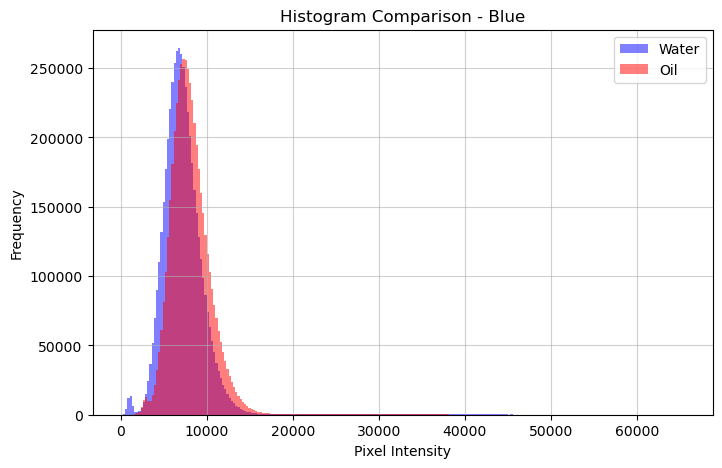

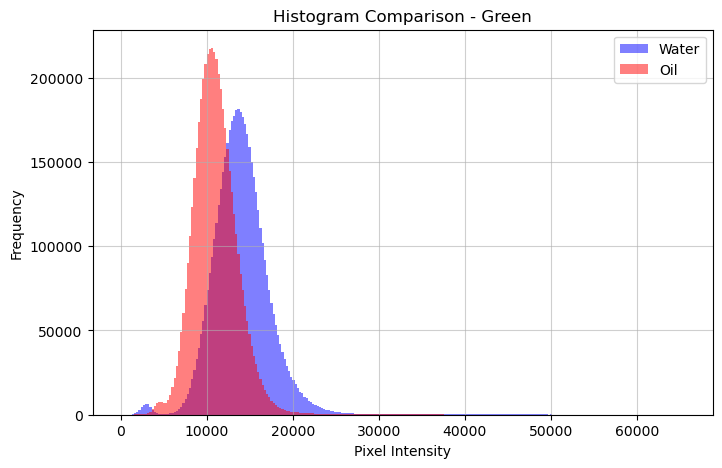

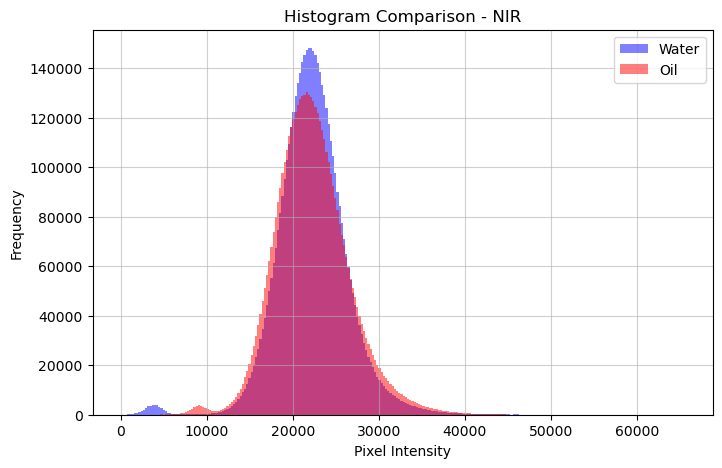

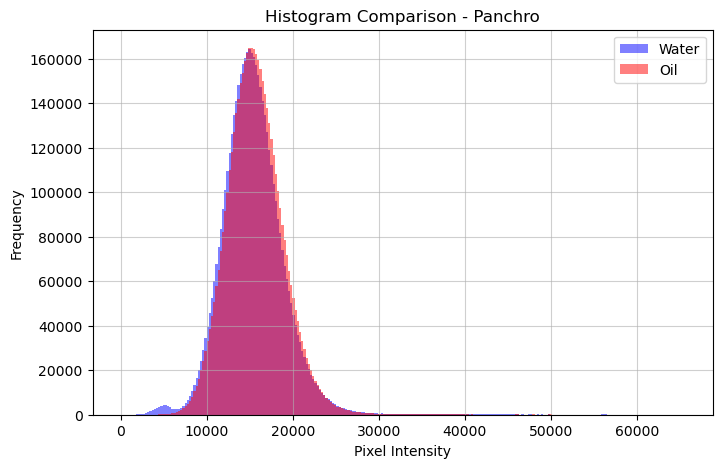

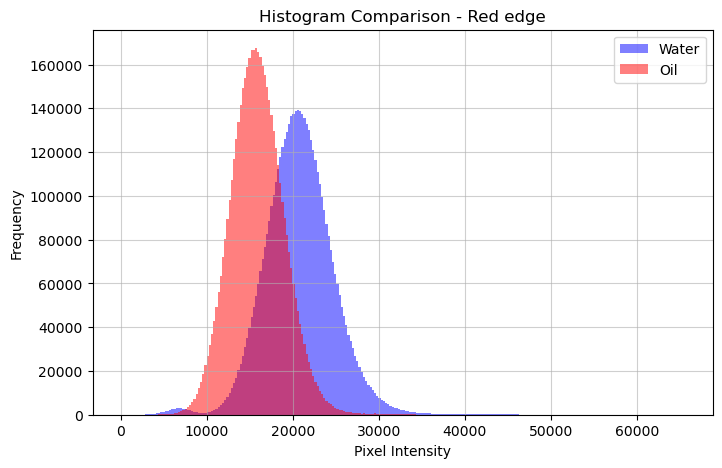

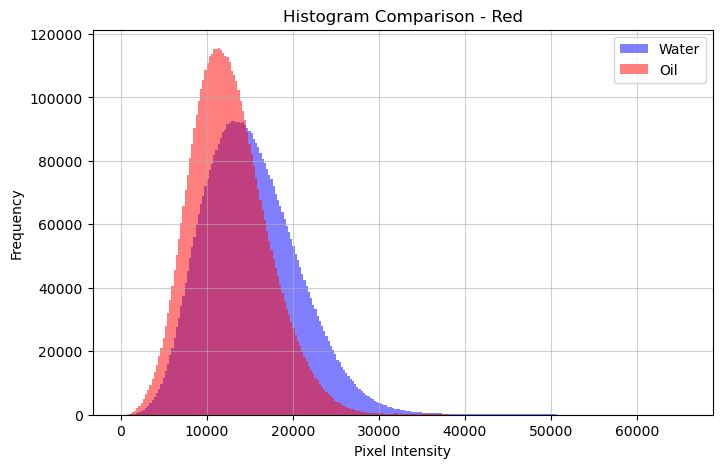

In [38]:
import os
import cv2
import matplotlib.pyplot as plt

def plot_histograms_by_band(water_folder, oil_folder):
    """
    Compare histograms for images from two folders based on band name extracted from file names.
    :param water_folder: Path to the folder containing water patch images.
    :param oil_folder: Path to the folder containing oil patch images.
    """
    # Collect and sort files in both folders
    water_images = sorted([f for f in os.listdir(water_folder) if f.endswith(".tif")])
    oil_images = sorted([f for f in os.listdir(oil_folder) if f.endswith(".tif")])

    # Check if number of images matches
    if len(water_images) != len(oil_images):
        raise ValueError("Mismatched number of images in water and oil folders.")

    for water_file, oil_file in zip(water_images, oil_images):
        # Extract band name from file name (assuming 'BandX' format)
        band_name_water = os.path.splitext(water_file)[0]
        band_name_oil = os.path.splitext(oil_file)[0]
        
        if band_name_water != band_name_oil:
            raise ValueError(f"Mismatched bands: {band_name_water} and {band_name_oil}")
        
        band_name = band_name_water.split("_")[0]  # Extract 'BandX' from file name
        
        # Load images
        water_path = os.path.join(water_folder, water_file)
        oil_path = os.path.join(oil_folder, oil_file)
        
        water_image = cv2.imread(water_path, cv2.IMREAD_UNCHANGED).flatten()
        oil_image = cv2.imread(oil_path, cv2.IMREAD_UNCHANGED).flatten()

        # Plot histograms
        plt.figure(figsize=(8, 5))
        plt.hist(water_image, bins=256, range=(0, 65535), alpha=0.5, label='Water', color='blue')
        plt.hist(oil_image, bins=256, range=(0, 65535), alpha=0.5, label='Oil', color='red')
        plt.title(f"Histogram Comparison - {band_name}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(alpha=0.6)
        plt.show()

# Paths to folders
# water_folder = "path/to/water_folder"
# oil_folder = "path/to/oil_folder"

water_folder = "data/20_15/water"
oil_folder = "data/20_15/oil"

# Call the function to compare histograms
plot_histograms_by_band(water_folder, oil_folder)


## Normalized Difference
Shows contrast-enhanced maps to highlight differences in spectral response.

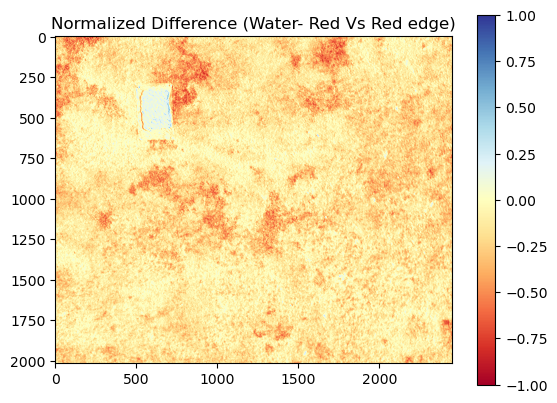

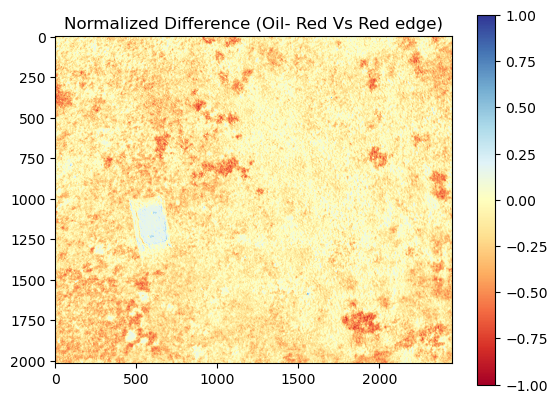

In [ ]:
def compute_normalized_difference(image_path1, image_path2):
    """
    Compute normalized difference between two images.
    :param image_path1: Path to the first image.
    :param image_path2: Path to the second image.
    :return: Normalized difference image.
    """
    img1 = cv2.imread(image_path1, cv2.IMREAD_UNCHANGED).astype(np.float32) 
    img2 = cv2.imread(image_path2, cv2.IMREAD_UNCHANGED).astype(np.float32)
    nd = (img1 - img2) / (img1 + img2 + 1e-6)
    return nd

# Example for Band4 and Band6
nd_image = compute_normalized_difference("data/20_15/water/Red.tif", "data/20_15/water/Red edge.tif")
plt.imshow(nd_image, cmap='RdYlBu')
plt.colorbar()
plt.title("Normalized Difference (Water- Red Vs Red edge)")
plt.show()

# Example for Band4 and Band6
nd_image = compute_normalized_difference("data/20_15/oil/Red.tif", "data/20_15/oil/Red edge.tif")
plt.imshow(nd_image, cmap='RdYlBu')
plt.colorbar()
plt.title("Normalized Difference (Oil- Red Vs Red edge)")
plt.show()


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.filters import sobel

# Function to load a single-band GeoTIFF image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image

def convert_to_8bit(image):
    # Normalize the image to the range [0, 255]
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    # Convert to uint8
    return normalized_image.astype('uint8')

# Function for histogram equalization
def enhance_contrast(image):
    # Convert to 8-bit if necessary
    if image.dtype != 'uint8':
        image = convert_to_8bit(image)
    # Apply histogram equalization
    return cv2.equalizeHist(image)


# Function for texture analysis using LBP
def texture_analysis(image, radius=1, n_points=8):
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    return lbp

# Function for edge detection using Sobel filter
def edge_detection(image):
    edges = sobel(image)
    return edges

# Function to plot histograms of water and oil patches side by side
def plot_histograms(image1, image2, label1, label2):
    plt.figure(figsize=(12, 6))
    plt.hist(image1.ravel(), bins=256, alpha=0.5, label=label1, color='blue')
    plt.hist(image2.ravel(), bins=256, alpha=0.5, label=label2, color='orange')
    plt.title("Histogram Comparison")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Main comparison logic
def compare_water_oil(water_image_path, oil_image_path):
    # Load images
    water_image = load_image(water_image_path)
    oil_image = load_image(oil_image_path)

    print(f"Image dtype: {water_image.dtype}, shape: {water_image.shape}")
    print(f"Image dtype: {oil_image.dtype}, shape: {oil_image.shape}")

    # Enhance contrast
    water_enhanced = enhance_contrast(water_image)
    oil_enhanced = enhance_contrast(oil_image)

    # Texture analysis
    water_lbp = texture_analysis(water_enhanced)
    oil_lbp = texture_analysis(oil_enhanced)

    # Edge detection
    water_edges = edge_detection(water_enhanced)
    oil_edges = edge_detection(oil_enhanced)

    # Plot histograms
    plot_histograms(water_enhanced, oil_enhanced, "Water Patch", "Oil Patch")

    # Show texture analysis results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(water_lbp, cmap='gray')
    plt.title("Water Patch Texture (LBP)")
    plt.subplot(1, 2, 2)
    plt.imshow(oil_lbp, cmap='gray')
    plt.title("Oil Patch Texture (LBP)")
    plt.show()

    # Show edge detection results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(water_edges, cmap='gray')
    plt.title("Water Patch Edges (Sobel)")
    plt.subplot(1, 2, 2)
    plt.imshow(oil_edges, cmap='gray')
    plt.title("Oil Patch Edges (Sobel)")
    plt.show()


Image dtype: uint16, shape: (2014, 2448)
Image dtype: uint16, shape: (2014, 2448)


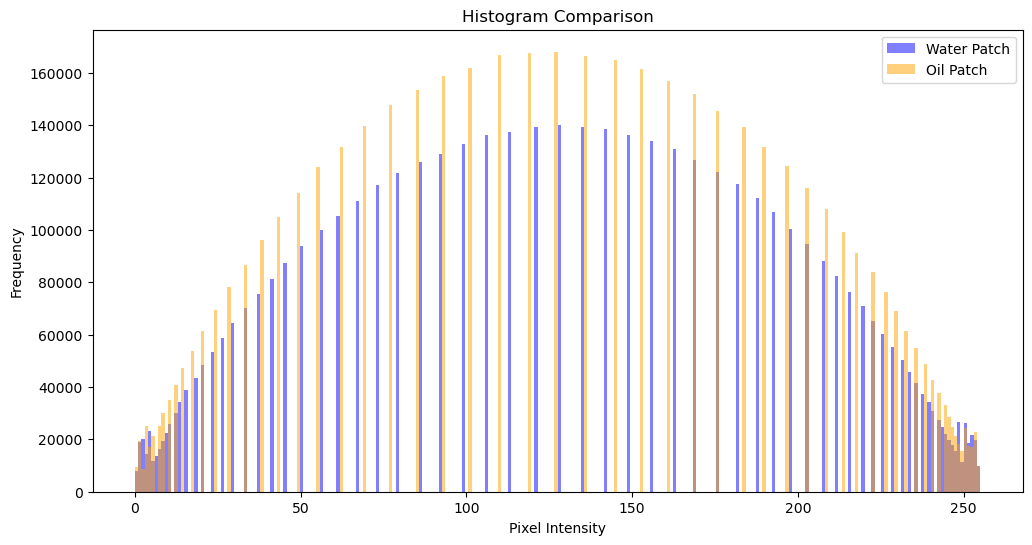

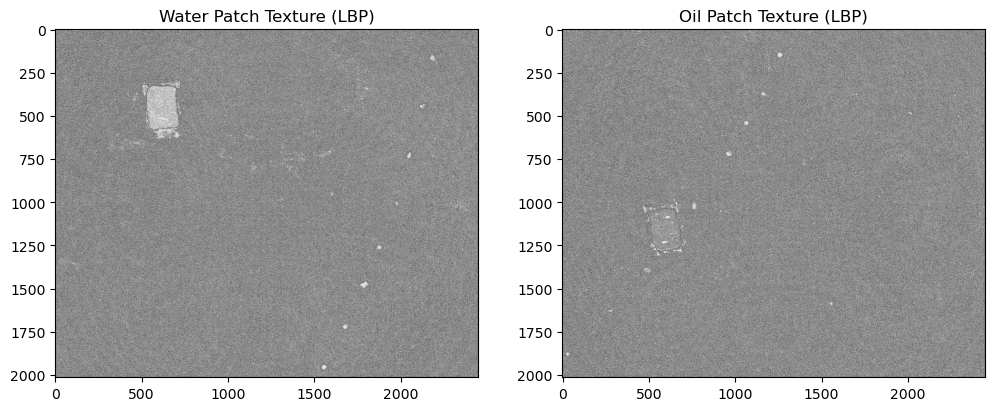

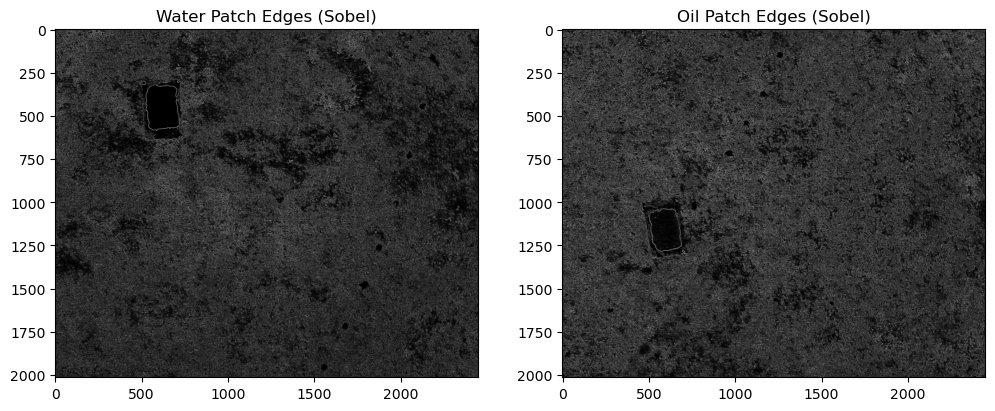

In [32]:
# Example usage
compare_water_oil("data/20_15/water/Red edge.tif", "data/20_15/oil/Red edge.tif")

c:\Users\Asus\anaconda3\envs\micasense\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


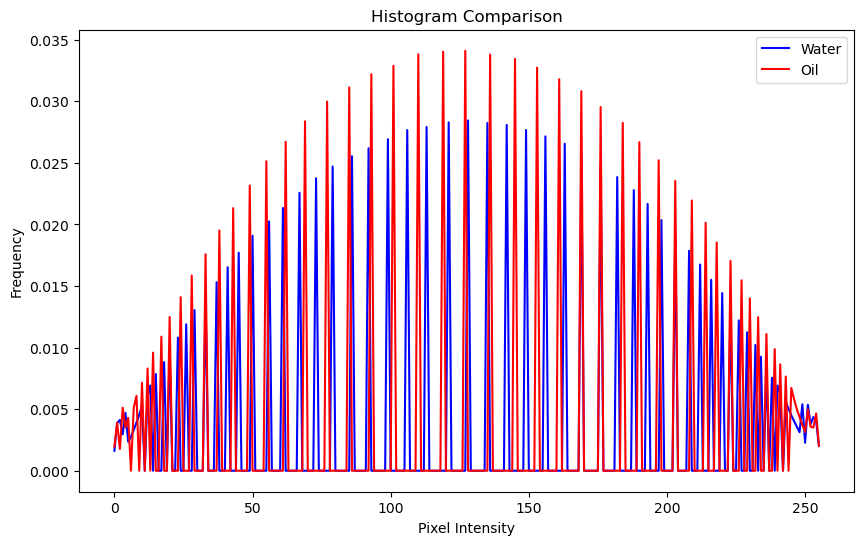

In [33]:
import cv2
import numpy as np
from osgeo import gdal

def load_image(image_path):
    dataset = gdal.Open(image_path)
    return dataset.ReadAsArray()

def convert_to_8bit(image):
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return normalized_image.astype('uint8')

def enhance_contrast(image):
    if image.dtype != 'uint8':
        image = convert_to_8bit(image)
    return cv2.equalizeHist(image)

def compare_water_oil(water_image_path, oil_image_path):
    # Load images
    water_image = load_image(water_image_path)
    oil_image = load_image(oil_image_path)

    # Enhance contrast
    water_enhanced = enhance_contrast(water_image)
    oil_enhanced = enhance_contrast(oil_image)

    # Compare histograms
    water_hist = cv2.calcHist([water_enhanced], [0], None, [256], [0, 256])
    oil_hist = cv2.calcHist([oil_enhanced], [0], None, [256], [0, 256])

    # Normalize histograms for comparison
    water_hist = water_hist / np.sum(water_hist)
    oil_hist = oil_hist / np.sum(oil_hist)

    # Plot histograms
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(water_hist, label="Water", color='blue')
    plt.plot(oil_hist, label="Oil", color='red')
    plt.title("Histogram Comparison")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Example usage
compare_water_oil("data/20_15/water/Red edge.tif", "data/20_15/oil/Red edge.tif")


## PCA

c:\Users\Asus\anaconda3\envs\micasense\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


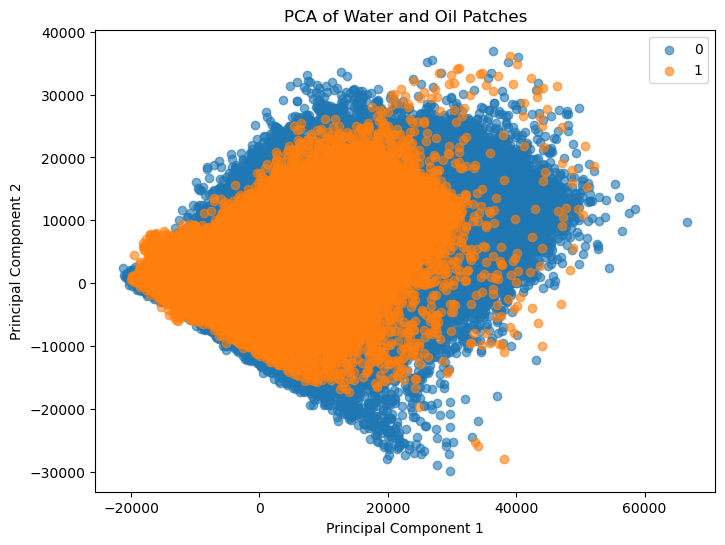

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from osgeo import gdal

# Function to load and stack bands from a folder
def load_and_stack_images(image_paths):
    stacked_data = []
    for path in image_paths:
        dataset = gdal.Open(path)
        band_data = dataset.ReadAsArray()
        stacked_data.append(band_data.flatten())  # Flatten each band
    return np.array(stacked_data).T  # Transpose to shape (pixels, bands)

# Perform PCA
def perform_pca(stacked_data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(stacked_data)
    return pca, transformed_data

# Visualize PCA Results
def visualize_pca(pca, transformed_data, labels):
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=label, alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.title("PCA of Water and Oil Patches")
    plt.show()

# Example usage
water_image_paths = ["data/20_15/water/Red edge.tif", "data/20_15/water/Green.tif"]
oil_image_paths = ["data/20_15/oil/Red edge.tif", "data/20_15/oil/Green.tif"]

water_data = load_and_stack_images(water_image_paths)
oil_data = load_and_stack_images(oil_image_paths)

# Combine water and oil data
combined_data = np.vstack((water_data, oil_data))
labels = np.array([0] * len(water_data) + [1] * len(oil_data))  # 0 for water, 1 for oil

# Perform PCA
pca, transformed_data = perform_pca(combined_data)

# Visualize results
visualize_pca(pca, transformed_data, labels)


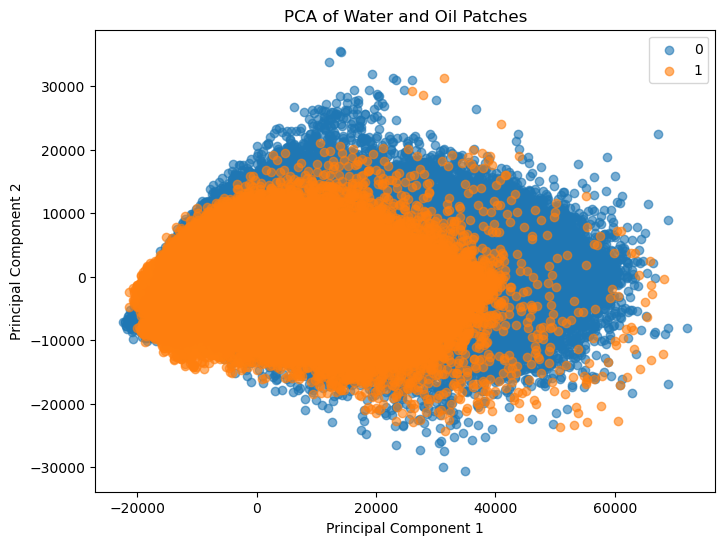

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from osgeo import gdal

# Function to load and stack bands from a folder
def load_and_stack_images(image_paths):
    stacked_data = []
    for path in image_paths:
        dataset = gdal.Open(path)
        band_data = dataset.ReadAsArray()
        stacked_data.append(band_data.flatten())  # Flatten each band
    return np.array(stacked_data).T  # Transpose to shape (pixels, bands)

# Perform PCA
def perform_pca(stacked_data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(stacked_data)
    return pca, transformed_data

# Visualize PCA Results
def visualize_pca(pca, transformed_data, labels):
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=label, alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.title("PCA of Water and Oil Patches")
    plt.show()

# Example usage
water_image_paths = ["data/20_15/water/Red edge.tif", "data/20_15/water/Green.tif", "data/20_15/water/Red.tif"]
oil_image_paths = ["data/20_15/oil/Red edge.tif", "data/20_15/oil/Green.tif", "data/20_15/oil/Red.tif" ]

water_data = load_and_stack_images(water_image_paths)
oil_data = load_and_stack_images(oil_image_paths)

# Combine water and oil data
combined_data = np.vstack((water_data, oil_data))
labels = np.array([0] * len(water_data) + [1] * len(oil_data))  # 0 for water, 1 for oil

# Perform PCA
pca, transformed_data = perform_pca(combined_data)

# Visualize results
visualize_pca(pca, transformed_data, labels)


c:\Users\Asus\anaconda3\envs\micasense\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


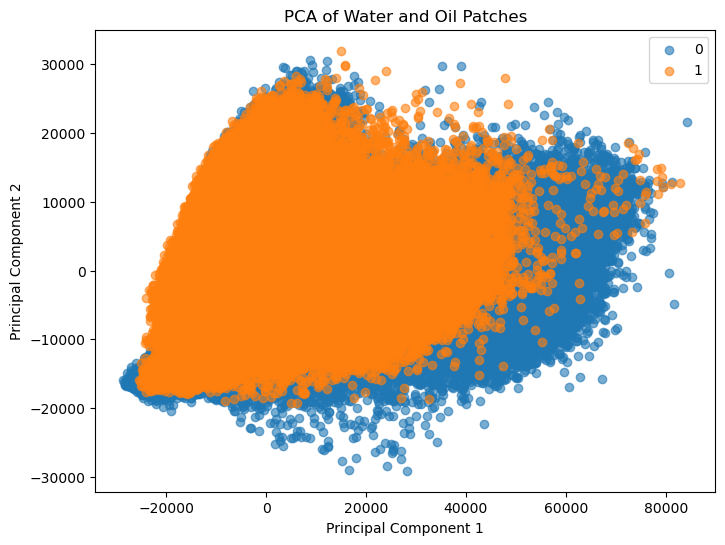

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from osgeo import gdal

# Function to load and stack bands from a folder
def load_and_stack_images(image_paths):
    stacked_data = []
    for path in image_paths:
        dataset = gdal.Open(path)
        band_data = dataset.ReadAsArray()
        stacked_data.append(band_data.flatten())  # Flatten each band
    return np.array(stacked_data).T  # Transpose to shape (pixels, bands)

# Perform PCA
def perform_pca(stacked_data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(stacked_data)
    return pca, transformed_data

# Visualize PCA Results
def visualize_pca(pca, transformed_data, labels):
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=label, alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.title("PCA of Water and Oil Patches")
    plt.show()

# Example usage
water_image_paths = ["data/20_15/water/Red edge.tif", "data/20_15/water/Green.tif", "data/20_15/water/Red.tif", "data/20_15/water/Blue.tif", "data/20_15/water/Nir.tif"]
oil_image_paths = ["data/20_15/oil/Red edge.tif", "data/20_15/oil/Green.tif", "data/20_15/oil/Red.tif", "data/20_15/oil/Blue.tif", "data/20_15/oil/Nir.tif" ]

water_data = load_and_stack_images(water_image_paths)
oil_data = load_and_stack_images(oil_image_paths)

# Combine water and oil data
combined_data = np.vstack((water_data, oil_data))
labels = np.array([0] * len(water_data) + [1] * len(oil_data))  # 0 for water, 1 for oil

# Perform PCA
pca, transformed_data = perform_pca(combined_data)

# Visualize results
visualize_pca(pca, transformed_data, labels)


## Dividing Image into Strips and Plotting Histograms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

def load_image_as_array(image_path):
    """Load a single-band GeoTIFF image as a NumPy array."""
    dataset = gdal.Open(image_path)
    return dataset.ReadAsArray()

def divide_into_strips(image, num_strips):
    """
    Divide an image into vertical strips.
    :param image: 2D NumPy array of the image.
    :param num_strips: Number of strips to divide the image into.
    :return: List of strips (each a 2D NumPy array).
    """
    height, width = image.shape
    strip_width = width // num_strips
    strips = []
    for i in range(num_strips):
        start = i * strip_width
        end = (i + 1) * strip_width if i < num_strips - 1 else width  # Handle edge case for last strip
        strips.append(image[:, start:end])
    return strips

def visualize_strips_and_histograms(image_path, num_strips):
    """
    Visualize each strip of the image and its histogram side by side.
    :param image_path: Path to the single-band GeoTIFF image.
    :param num_strips: Number of strips to divide the image into.
    """
    # Load image
    image = load_image_as_array(image_path)
    
    # Divide image into strips
    strips = divide_into_strips(image, num_strips)
    
    # Plot strips and histograms
    plt.figure(figsize=(15, 5 * num_strips))
    
    for i, strip in enumerate(strips):
        # Display strip image
        plt.subplot(num_strips, 2, 2 * i + 1)
        plt.imshow(strip, cmap='gray')
        plt.title(f"Strip {i + 1}")
        plt.axis('off')
        
        # Display histogram for the strip
        plt.subplot(num_strips, 2, 2 * i + 2)
        plt.hist(strip.flatten(), bins=256, color='blue', alpha=0.7)
        plt.title(f"Histogram for Strip {i + 1}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

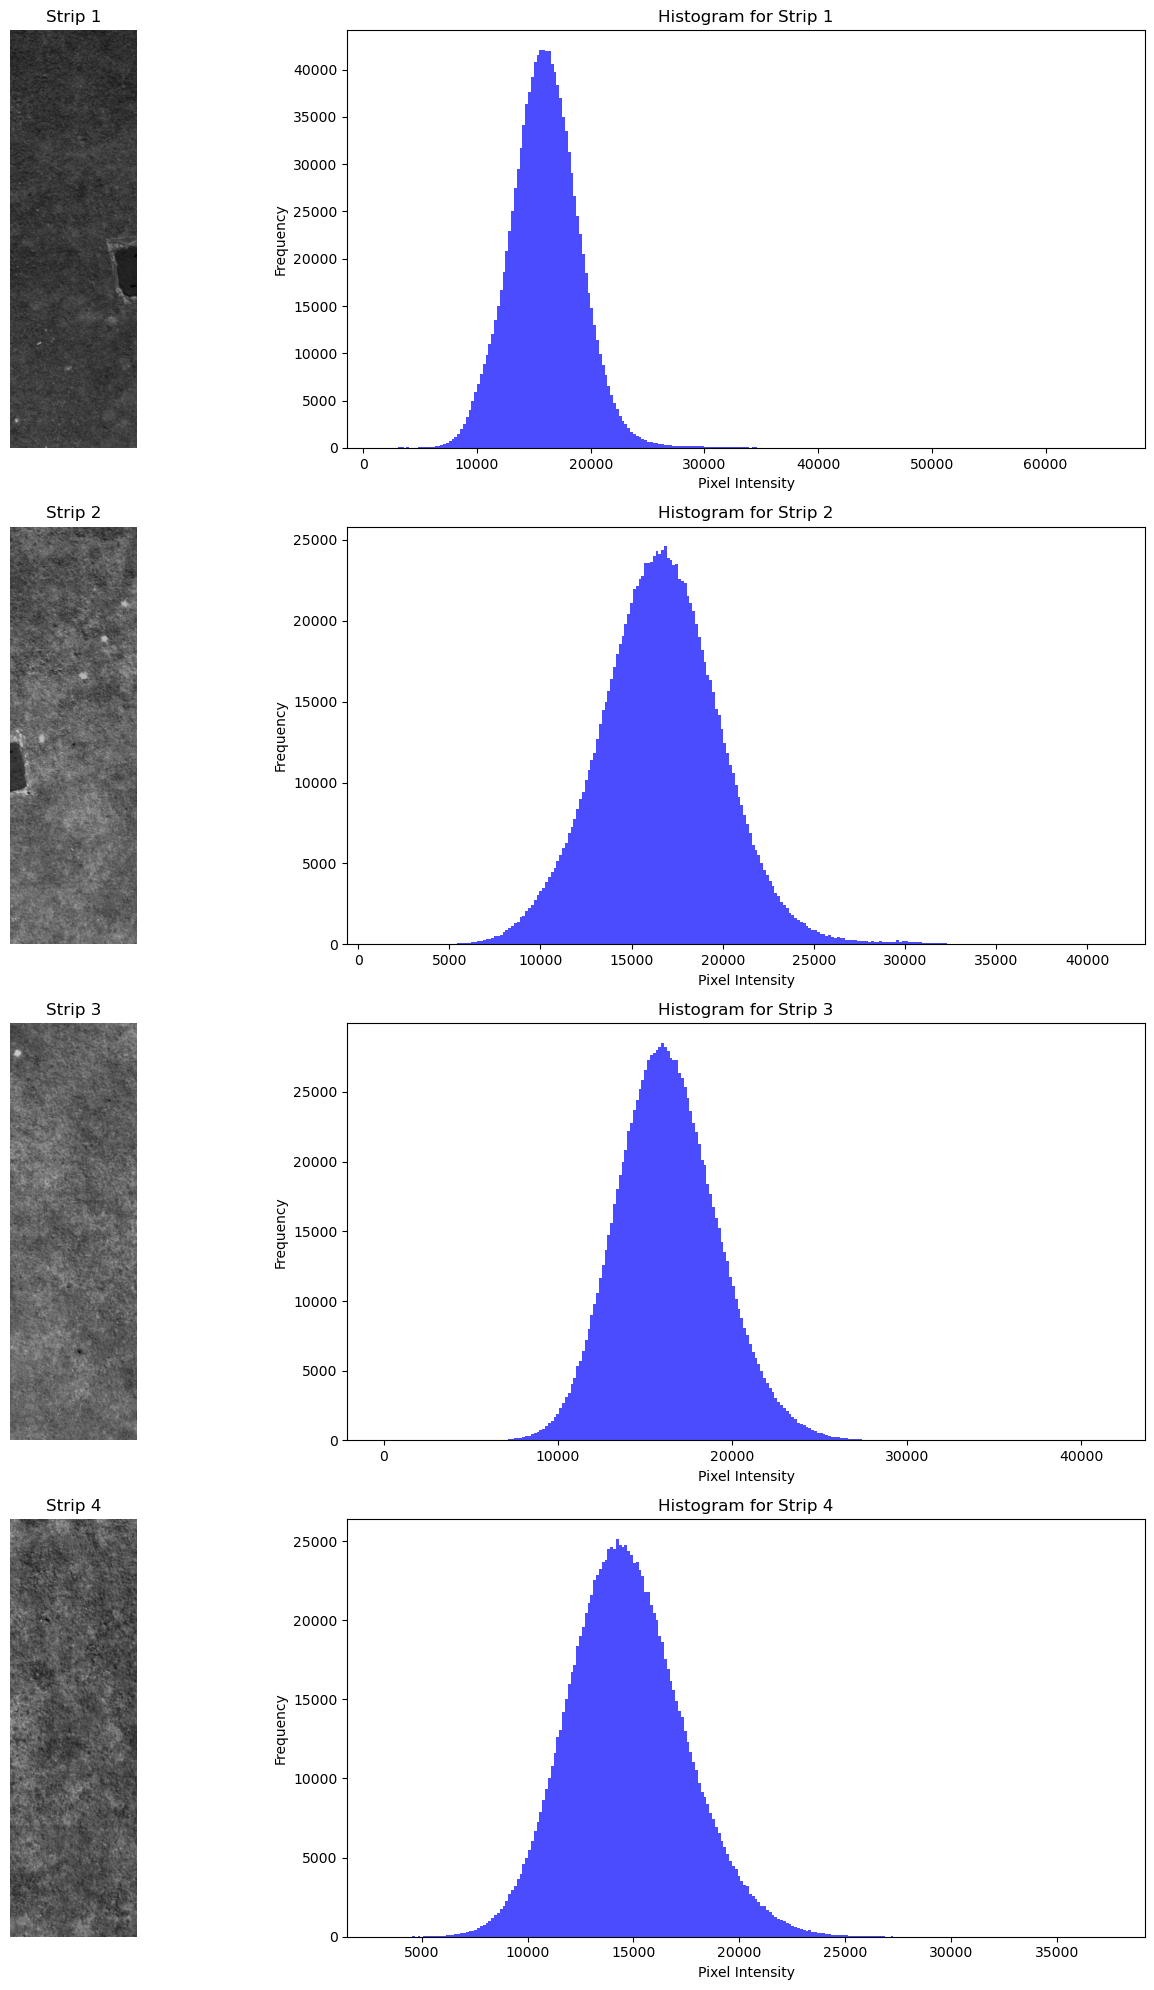

In [5]:
# Example usage
image_path = "data/20_15/oil/Red edge.tif"
num_strips = 4  # Divide image into 4 strips
visualize_strips_and_histograms(image_path, num_strips)

## Horizontal

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

def load_image_as_array(image_path):
    """Load a single-band GeoTIFF image as a NumPy array."""
    dataset = gdal.Open(image_path)
    return dataset.ReadAsArray()

def divide_into_horizontal_strips(image, num_strips):
    """
    Divide an image into horizontal strips.
    :param image: 2D NumPy array of the image.
    :param num_strips: Number of strips to divide the image into.
    :return: List of strips (each a 2D NumPy array).
    """
    height, width = image.shape
    strip_height = height // num_strips
    strips = []
    for i in range(num_strips):
        start = i * strip_height
        end = (i + 1) * strip_height if i < num_strips - 1 else height  # Handle edge case for last strip
        strips.append(image[start:end, :])
    return strips

def visualize_horizontal_strips_and_histograms(image_path, num_strips):
    """
    Visualize each horizontal strip of the image and its histogram side by side.
    :param image_path: Path to the single-band GeoTIFF image.
    :param num_strips: Number of strips to divide the image into.
    """
    # Load image
    image = load_image_as_array(image_path)
    
    # Divide image into horizontal strips
    strips = divide_into_horizontal_strips(image, num_strips)
    
    # Plot strips and histograms
    plt.figure(figsize=(15, 5 * num_strips))
    
    for i, strip in enumerate(strips):
        # Display strip image
        plt.subplot(num_strips, 2, 2 * i + 1)
        plt.imshow(strip, cmap='gray')
        plt.title(f"Strip {i + 1}")
        plt.axis('off')
        
        # Display histogram for the strip
        plt.subplot(num_strips, 2, 2 * i + 2)
        plt.hist(strip.flatten(), bins=256, color='blue', alpha=0.7)
        plt.title(f"Histogram for Strip {i + 1}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

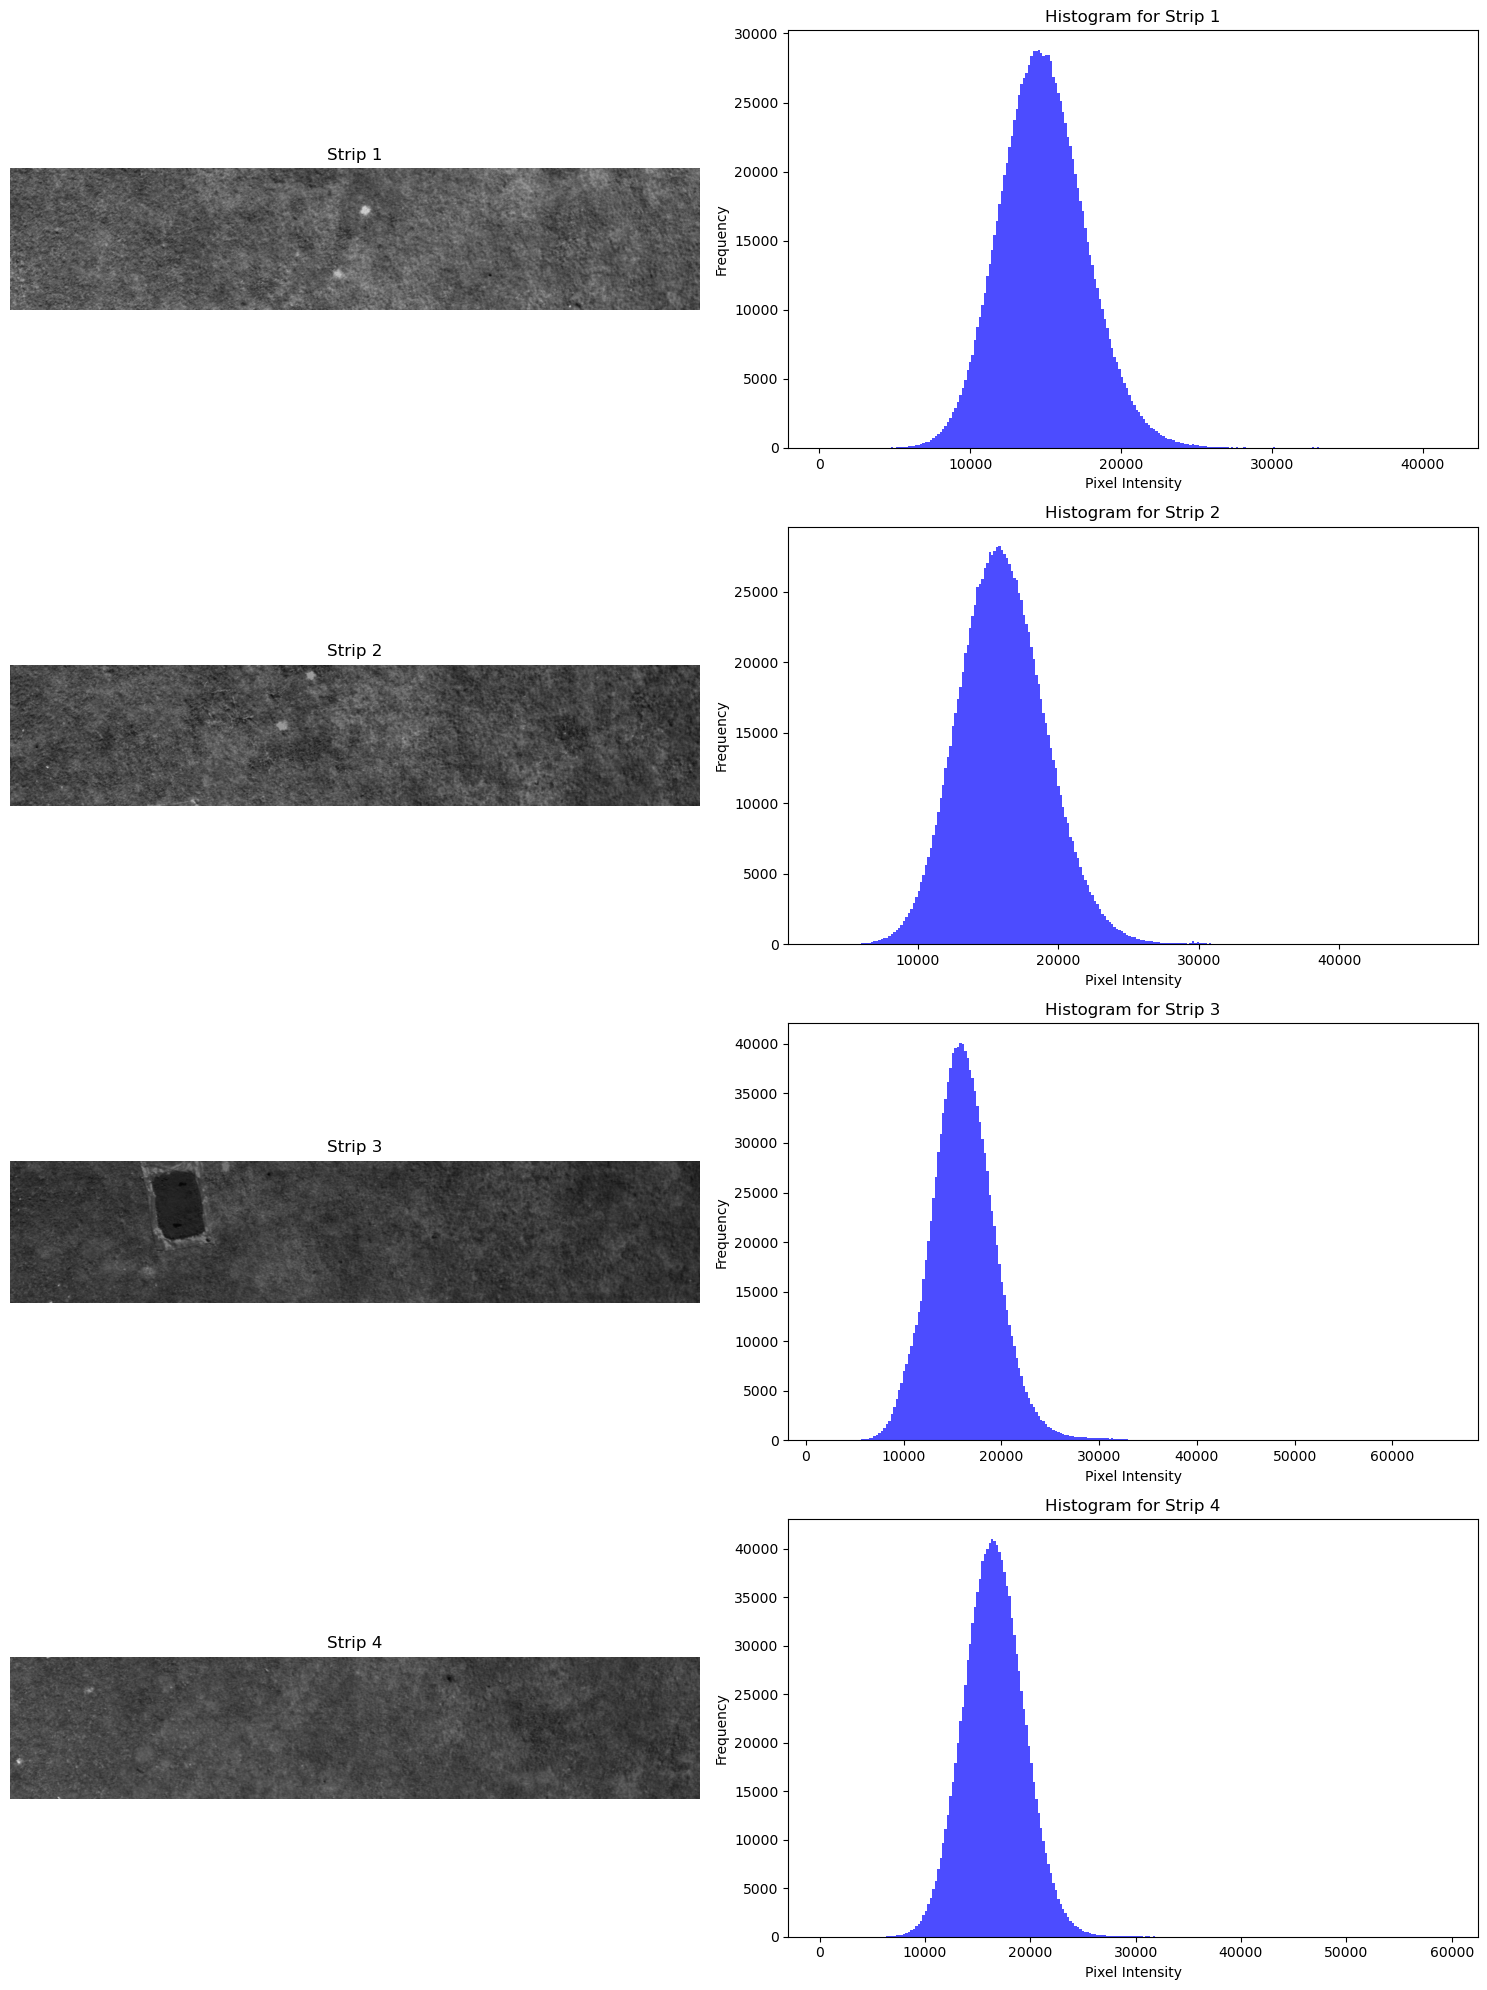

In [7]:

# Example usage
image_path = "data/20_15/oil/Red edge.tif"
num_strips = 4  # Divide image into 4 horizontal strips
visualize_horizontal_strips_and_histograms(image_path, num_strips)